Solving linear variational problem.


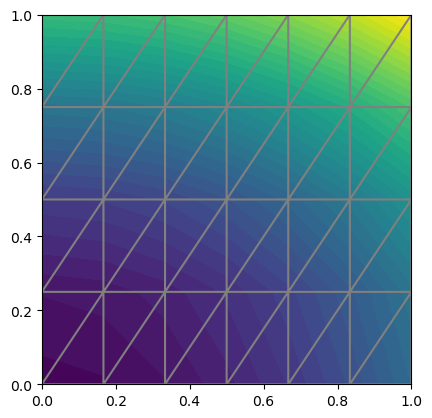

In [ ]:
from fenics import *

mesh = UnitSquareMesh(6, 4)
V = FunctionSpace(mesh, 'Lagrange', 1)

u0 = Expression('1 + x[0]*x[0] + 2*x[1]*x[1]', degree=2)

bc = DirichletBC(V, u0, 'on_boundary')

u = TrialFunction(V)
v = TestFunction(V)
f = Constant(-6.0)
a = inner(grad(u), grad(v))*dx
L = f*v*dx

u = Function(V)
solve(a == L, u, bc)

plot(u)
plot(mesh)

file = File('poisson.pvd')
file << u